In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


In [8]:
print (sns.__version__)
print (pd.__version__)
print (np.__version__)
print(plt.__version__)

0.13.0
2.1.1
1.25.2


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

Se importan los archivos csv procesados con anterioridad

median_price_gb_BOROUGH.csv

median_price_gb_neighborhood.csv

N_sales_gb_BOROUGH.csv

N_sales_gb_neighborhood.csv

price_per_sf_BOROUGH.csv

price_per_sf_neighborhood.csv

sale_to_list_BOROUGH.CSV

sale_to_list_neighborhood.csv


In [ ]:
median_price_B = pd.read_csv('median_price_gb_BOROUGH.csv')
median_price_n = pd.read_csv('median_price_gb_neighborhood.csv')
N_sales_B = pd.read_csv('N_sales_gb_BOROUGH.csv')
N_sales_n = pd.read_csv('N_sales_gb_neighborhood.csv')
price_psf_B = pd.read_csv('price_per_sf_BOROUGH.csv')
price_psf_n = pd.read_csv('price_per_sf_neighborhood.csv')
sale_to_list_B = pd.read_csv('sale_to_list_BOROUGH.CSV')
sale_to_list_n = pd.read_csv('sale_to_list_neighborhood.csv')







median_price_B.dropna(inplace=True)

median_price_B.Time = pd.to_datetime(median_price_B["Time"], format="%d-%m-%Y")

In [ ]:
median_price_B

,Time,Bronx,Brooklyn,Manhattan,Queens,Staten Island
42,2015-07-01,320738.360000,7.128299e+05,1.216698e+06,457962.713235,409034.615385
43,2015-08-01,327244.720000,7.307973e+05,1.229063e+06,473225.073529,418573.538462
44,2015-09-01,340694.720000,7.537635e+05,1.255044e+06,494265.713235,420192.307692
45,2015-10-01,344691.666667,7.465927e+05,1.272524e+06,481040.720588,416171.538462
46,2015-11-01,341125.000000,7.335312e+05,1.321259e+06,478444.470588,413715.769231
...,...,...,...,...,...,...
135,2023-04-01,486635.416667,1.003641e+06,1.291522e+06,656160.286765,617803.384615
136,2023-05-01,504043.478261,1.034081e+06,1.317291e+06,673788.463768,621337.538462
137,2023-06-01,537795.520833,1.030059e+06,1.263594e+06,671845.652174,641119.961538
138,2023-07-01,570300.000000,1.007373e+06,1.191790e+06,688156.014493,647634.615385


<function matplotlib.pyplot.show(close=None, block=None)>

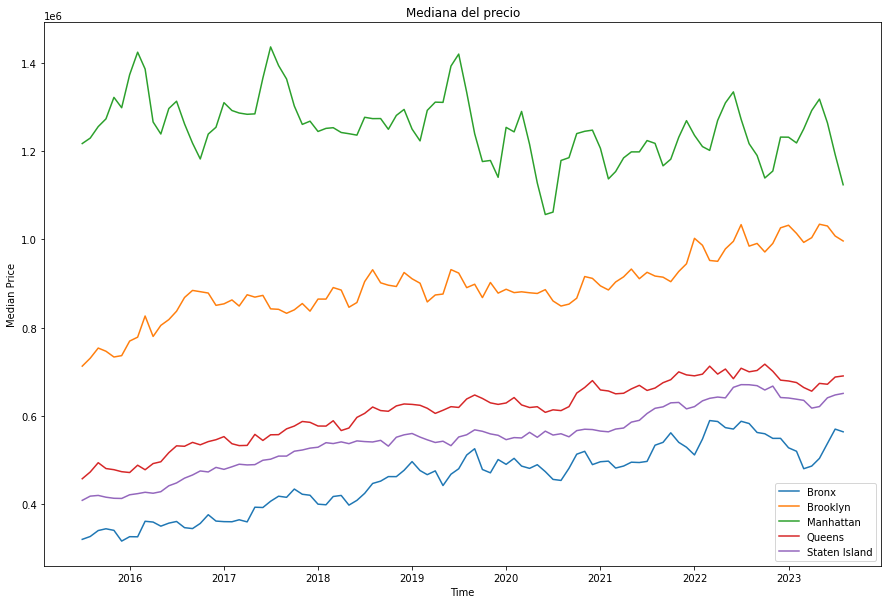

In [ ]:
plt.figure(figsize=(15, 10))

# Graficar las cinco tendencias de línea superpuestas

sns.lineplot(data=median_price_B, x='Time', y='Bronx', label='Bronx')
sns.lineplot(data=median_price_B, x='Time', y='Brooklyn', label='Brooklyn')
sns.lineplot(data=median_price_B, x='Time', y='Manhattan', label='Manhattan')
sns.lineplot(data=median_price_B, x='Time', y='Queens', label='Queens')
sns.lineplot(data=median_price_B, x='Time', y='Staten Island', label='Staten Island')
plt.xlabel("Time")

plt.ylabel("Median Price")
plt.title("Mediana del precio")
plt.show

Se ve una tendencia a la suba en todos los distritos, excepto claramente en Manhattan en donde los precios vienen bajando. Por otro lado, la variacion de precios es mayor en este ultimo distrito es mayor respecto a los demas.

In [ ]:
nombres_columnas = median_price_B.columns.tolist()
nombres_columnas = ['Bronx',
'Brooklyn',
 'Manhattan',
 'Queens',
 'Staten Island']
nombres_columnas


['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [ ]:
# Crear una nueva columna 'año' y 'mes' a partir de la columna 'fecha'
median_price_B['año'] = median_price_B['Time'].dt.year
median_price_B['mes'] = median_price_B['Time'].dt.month

# Realizar el groupby por año y mes y sumar los valores
resultado = median_price_B.groupby(['mes'])[[
 'Bronx',
 'Brooklyn',
 'Manhattan',
 'Queens',
 'Staten Island']].sum().reset_index()

# Renombrar las columnas para mayor claridad
resultado = resultado.rename(columns={'año': 'Año', 'mes': 'Mes', 'valor': 'Suma de Valores'})

# Mostrar el resultado
resultado
#median_price_B

,Mes,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,1,3.611600e+06,7.213992e+06,1.010092e+07,4.887357e+06,4.364603e+06
1,2,3.632357e+06,7.170440e+06,9.996384e+06,4.895850e+06,4.388600e+06
2,3,3.650714e+06,7.153493e+06,1.010930e+07,4.870454e+06,4.397863e+06
3,4,3.658440e+06,7.161053e+06,1.006051e+07,4.820227e+06,4.392105e+06
4,5,3.647641e+06,7.218519e+06,1.002216e+07,4.902817e+06,4.398944e+06
5,6,3.704538e+06,7.301514e+06,1.013971e+07,4.913352e+06,4.480053e+06
6,7,4.106333e+06,8.046385e+06,1.140848e+07,5.441100e+06,4.935237e+06
7,8,4.186853e+06,8.008253e+06,1.122437e+07,5.487402e+06,4.984735e+06
8,9,3.664721e+06,7.028200e+06,9.888219e+06,4.864727e+06,4.351522e+06
9,10,3.712919e+06,6.974106e+06,9.740075e+06,4.894678e+06,4.364539e+06


<function matplotlib.pyplot.show(close=None, block=None)>

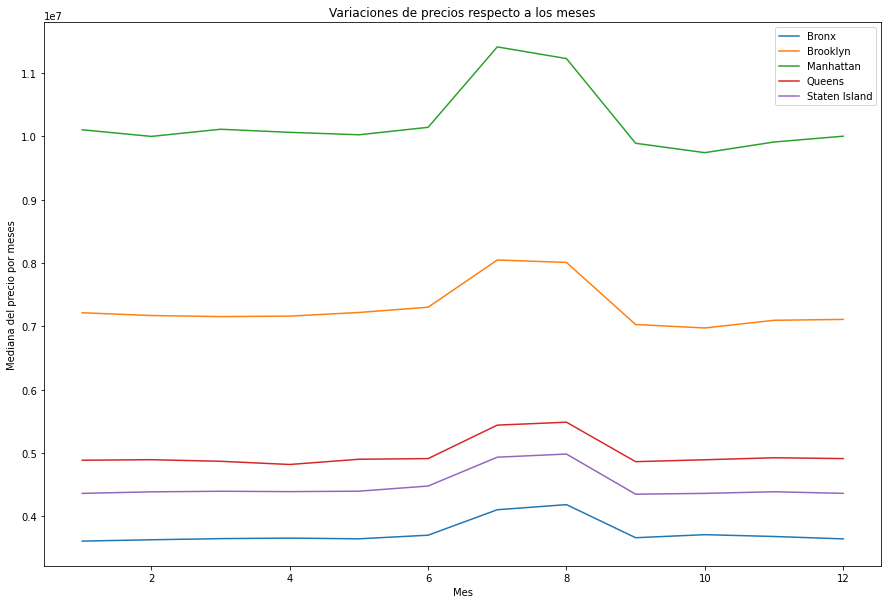

In [ ]:
plt.figure(figsize=(15, 10))

# Graficar las cinco tendencias de línea superpuestas

sns.lineplot(data=resultado, x='Mes', y='Bronx', label='Bronx')
sns.lineplot(data=resultado, x='Mes', y='Brooklyn', label='Brooklyn')
sns.lineplot(data=resultado, x='Mes', y='Manhattan', label='Manhattan')
sns.lineplot(data=resultado, x='Mes', y='Queens', label='Queens')
sns.lineplot(data=resultado, x='Mes', y='Staten Island', label='Staten Island')
plt.xlabel("Mes")

plt.ylabel("Mediana del precio por meses")
plt.title("Variaciones de precios respecto a los meses")
plt.show



Puede verse que en general los precios tienden a ser mas elevados en los meses de Julio y Agosto.

In [ ]:
def trend1(df, x_label, y_label, title):
    plt.figure(figsize=(15, 10))

    
    sns.lineplot(data=df, x='Time', y='Bronx', label='Bronx')
    sns.lineplot(data=df, x='Time', y='Brooklyn', label='Brooklyn')
    sns.lineplot(data=df, x='Time', y='Manhattan', label='Manhattan')
    sns.lineplot(data=df, x='Time', y='Queens', label='Queens')
    sns.lineplot(data=df, x='Time', y='Staten Island', label='Staten Island')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show
    


In [ ]:
N_sales_B = pd.read_csv('N_sales_gb_BOROUGH.csv')
def ETL1(df):
    df.dropna(inplace=True)
    df = df.loc[(df[nombres_columnas[0]]>0) & (df[nombres_columnas[1]]>0)&(df[nombres_columnas[2]]>0)&(df[nombres_columnas[3]]>0)&(df[nombres_columnas[4]]>0)]
    df["Time"] = pd.to_datetime(df["Time"], format="%d-%m-%Y");
    return df
N_sales_B =  ETL1(N_sales_B)


C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_3536\3064750359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"] = pd.to_datetime(df["Time"], format="%d-%m-%Y");


In [ ]:
N_sales_B["Time"] = pd.to_datetime(N_sales_B["Time"], format="%d-%m-%Y")

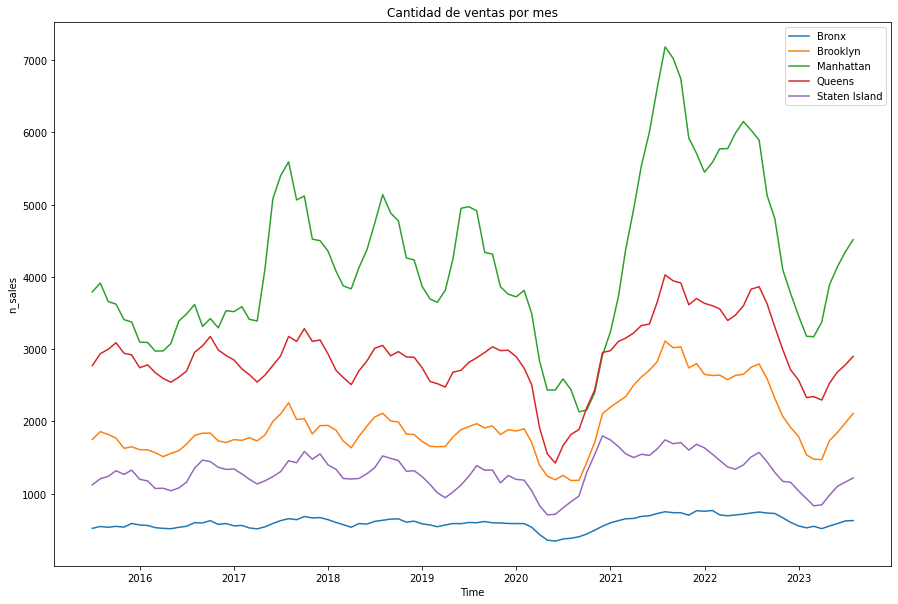

In [ ]:
trend1(N_sales_B, 'Time', 'n_sales', 'Cantidad de ventas por mes')


A partir del 2021 puede verse un aumento de la cantidad de ventas y hubo un pico en fines del 2021, esta variación es mayor en Manhattan. Por otro lado puede verse una variacion estacional que en el siguiente grafico puede verse con mayor claridad.

In [ ]:
def group_mes(df, mean_or_sum):
    if mean_or_sum == 'sum':
        df['año'] = df['Time'].dt.year
        df['mes'] = df['Time'].dt.month

        # Realizar el groupby por año y mes y sumar los valores
        resultado = df.groupby(['mes'])[[
        'Bronx',
        'Brooklyn',
        'Manhattan',
        'Queens',
        'Staten Island']].sum().reset_index()

        # Renombrar las columnas para mayor claridad
        return resultado.rename(columns={'año': 'Año', 'mes': 'Mes', 'valor': 'Suma de Valores'})
    else:
        df['año'] = df['Time'].dt.year
        df['mes'] = df['Time'].dt.month

        # Realizar el groupby por año y mes y sumar los valores
        resultado = df.groupby(['mes'])[[
        'Bronx',
        'Brooklyn',
        'Manhattan',
        'Queens',
        'Staten Island']].mean().reset_index()

        # Renombrar las columnas para mayor claridad
        return resultado.rename(columns={'año': 'Año', 'mes': 'Mes', 'valor': 'Suma de Valores'})

In [ ]:
N_sales_B_mes = group_mes(N_sales_B, 'sum')

In [ ]:
def trend2(df, y_label, title):
    plt.figure(figsize=(15, 10))

    # Graficar las cinco tendencias de línea superpuestas

    sns.lineplot(data=df, x='Mes', y='Bronx', label='Bronx')
    sns.lineplot(data=df, x='Mes', y='Brooklyn', label='Brooklyn')
    sns.lineplot(data=df, x='Mes', y='Manhattan', label='Manhattan')
    sns.lineplot(data=df, x='Mes', y='Queens', label='Queens')
    sns.lineplot(data=df, x='Mes', y='Staten Island', label='Staten Island')
    plt.xlabel("Mes")

    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


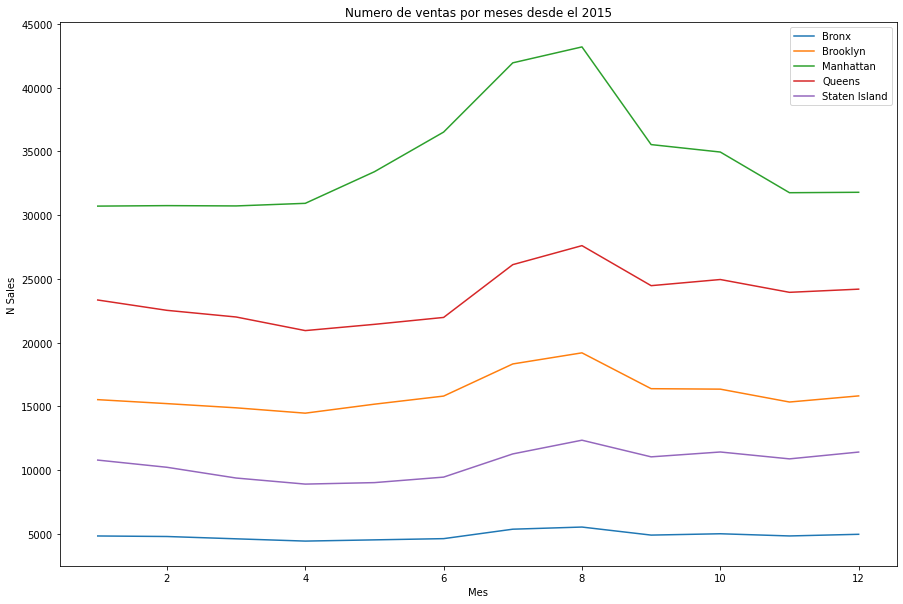

In [ ]:
trend2(N_sales_B_mes, 'N Sales', 'Numero de ventas por meses desde el 2015')

Al igual que en el segundo gráfico, se observa la variacion estacional de las ventas, donde en agosto se registra mayor cantidad de operaciones. Puede relacionarse este aumento de operaciones con el aumento de precios en general.

In [ ]:
sale_to_list_B = pd.read_csv('sale_to_list_BOROUGH.CSV')
sale_to_list_B = ETL1(sale_to_list_B)
sale_to_list_B_mes = group_mes(sale_to_list_B, 'mean')


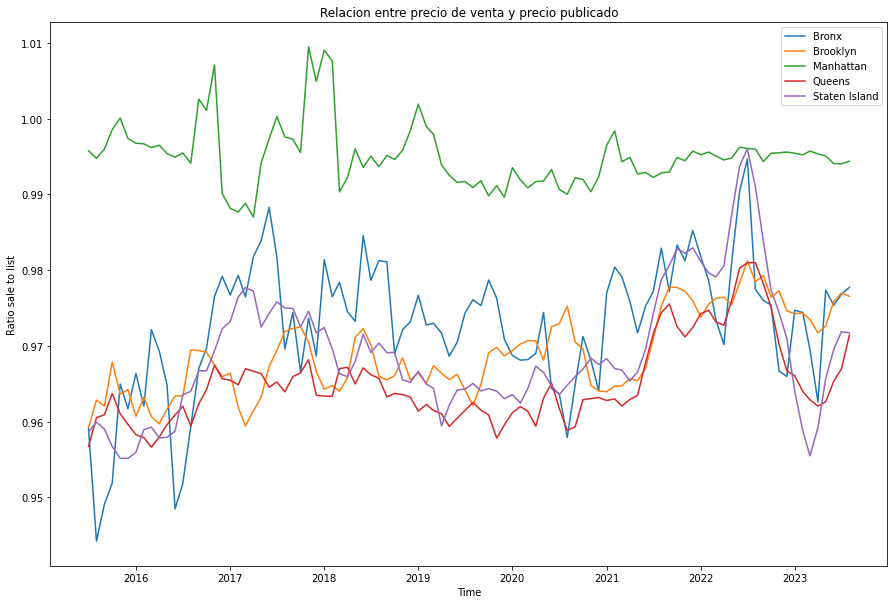

In [ ]:
trend1(sale_to_list_B, 'Time', 'Ratio sale to list', 'Relacion entre precio de venta y precio publicado')


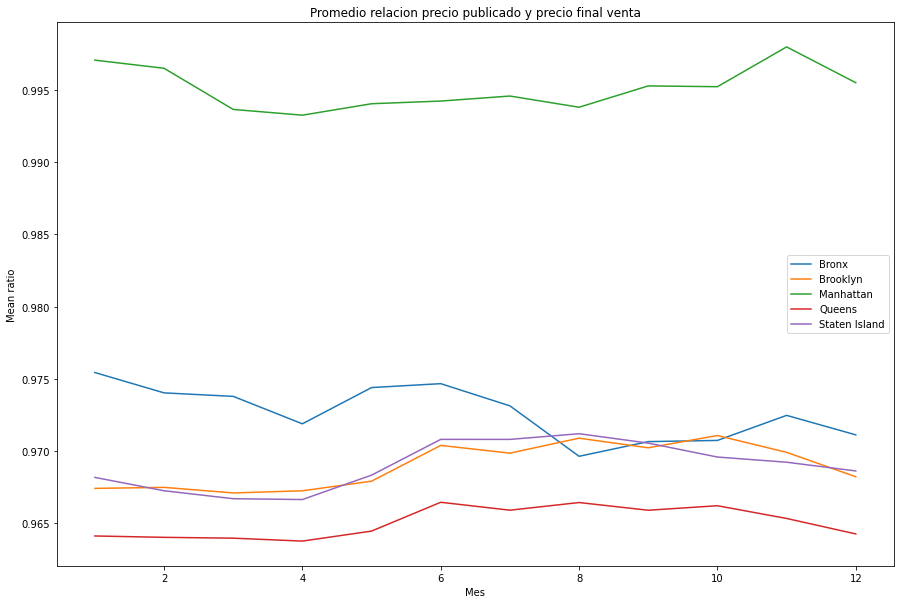

In [ ]:
trend2(sale_to_list_B_mes, 'Mean ratio', 'Promedio relacion precio publicado y precio final venta')

Excepto en Manhattan, en todos los distritos el valor con el que se cierra la operación es menor y hasta en un 5 % respecto al valor publicado. En los distritos de Brooklyn, Queens y Statten Island, en el mes de agosto 

In [ ]:
from scipy.optimize import curve_fit



In [ ]:
def ETL3(df):
    #esta funcion 

In [ ]:
price_psf_B = pd.read_csv('price_per_sf_BOROUGH.csv')
price_psf_B = ETL1(price_psf_B)
ppsf = price_psf_B.loc[price_psf_B['Time']>'2015-08-01'].reset_index().drop(columns=['index'])
ppsf['n_fecha'] = range(len(ppsf))

#empezamos en septiembre 2015
ppsf
#.sample(25)

,Time,Bronx,Brooklyn,Manhattan,Queens,Staten Island,n_fecha
0,2015-09-01,181.861906,548.553510,1303.185893,348.314665,248.283931,0
1,2015-10-01,182.380617,546.875657,1297.089290,357.580307,246.604297,1
2,2015-11-01,187.643385,545.101236,1328.367430,351.171336,246.202271,2
3,2015-12-01,187.955420,553.135257,1304.866259,352.097186,243.884101,3
4,2016-01-01,193.830053,568.560505,1342.297925,355.780571,244.416280,4
...,...,...,...,...,...,...,...
91,2023-04-01,304.210393,725.710215,1295.911638,507.207855,385.467350,91
92,2023-05-01,312.967864,759.291121,1325.837795,511.300735,391.640395,92
93,2023-06-01,313.999257,753.942231,1317.010942,515.877517,391.105951,93
94,2023-07-01,318.539239,759.989748,1299.508846,517.673771,393.587508,94


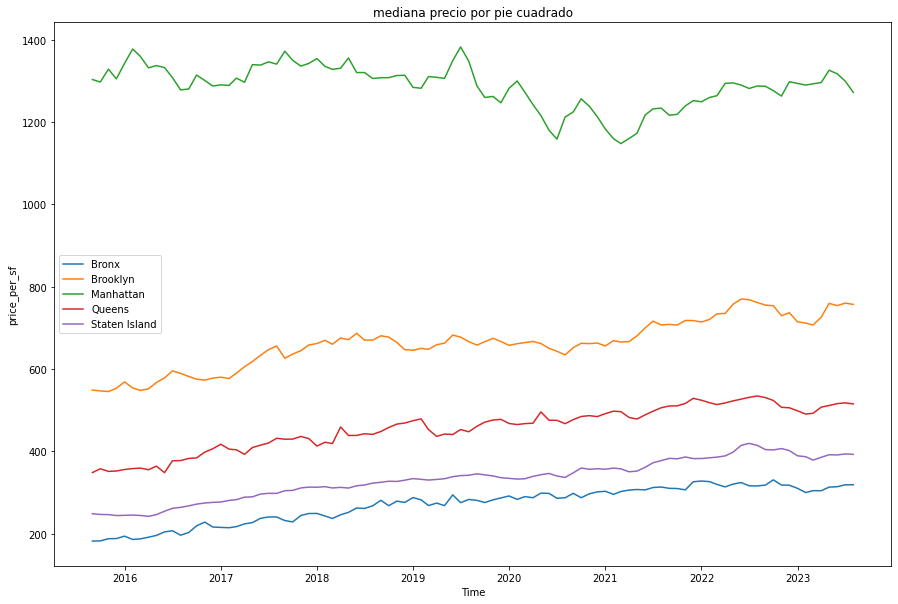

In [ ]:
trend1(ppsf,'Time', 'price_per_sf', 'mediana precio por pie cuadrado')

In [ ]:

# Suprimir FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
def modelo_sinusoidal_li(x, a, b, c, d, e, f):
    return a*np.sin(b*x + f) + c*x**2 + d*x + e




x = ppsf['n_fecha']
y = ppsf['Brooklyn']
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size=0.3, random_state=42)


parametros_optimizados, _ = curve_fit(modelo_sinusoidal_li, x_train, y_train)

a, b, c, d, e, f= parametros_optimizados

y_calc = modelo_sinusoidal_li(x_test, a=a, b=b, c=c, d=d, e=e, f=f)
R2=r2_score(y_test, y_calc)
rmse = mean_squared_error(y_test, y_calc, squared= False)
y_media = y.mean()
print('R2 es:', R2, 'RMSE: ', rmse, 'RMSE / y_media:', rmse/y_media*100)
print(a,b,c,d,e,f)


R2 es: 0.8459289271107635 RMSE:  23.21091117577486 RMSE / y_media: 3.5074665085271297
3.959042094007214 1.2048200117469388 -0.007413506537595037 2.6701489799494853 556.1202897375362 -3.1895087323001827


In [ ]:
1.2/(2*3.14)

0.19108280254777069

In [ ]:
def modelo_lineal(x, dl, el):
    return dl*x + el

x = ppsf['n_fecha']
y = ppsf['Brooklyn']
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size=0.3, random_state=42)


parametros_optimizados, _ = curve_fit(modelo_lineal, x_train, y_train)

dl, el = parametros_optimizados

y_calc = modelo_lineal(x_test, dl=dl, el=el)
R2=r2_score(y_test, y_calc)
rmse = mean_squared_error(y_test, y_calc, squared= False)
y_media = y.mean()
print('R2 es:', R2, 'RMSE: ', rmse, 'RMSE / y_media:', rmse/y_media*100)
print(dl,el)

R2 es: 0.8474177596277431 RMSE:  23.098492120124305 RMSE / y_media: 3.4904785467177666
1.9669237298650972 567.2874111244906


In [ ]:
def modelo_cubico(x, ac, bc, cc, dc, ec):
    return ec*x**4+ac*x**3+bc*x**2+cc*x + dc

x = ppsf['n_fecha']
y = ppsf['Brooklyn']
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size=0.3, random_state=42)


parametros_optimizados, _ = curve_fit(modelo_cubico, x_train, y_train)

ac, bc, cc, dc, ec = parametros_optimizados

y_calc = modelo_cubico(x_test, ac, bc, cc, dc, ec)
R2=r2_score(y_test, y_calc)
rmse = mean_squared_error(y_test, y_calc, squared= False)
y_media = y.mean()
print('R2 es:', R2, 'RMSE: ', rmse, 'RMSE / y_media:', rmse/y_media*100)


R2 es: 0.8797836068487839 RMSE:  20.50281452964141 RMSE / y_media: 3.09823835646383


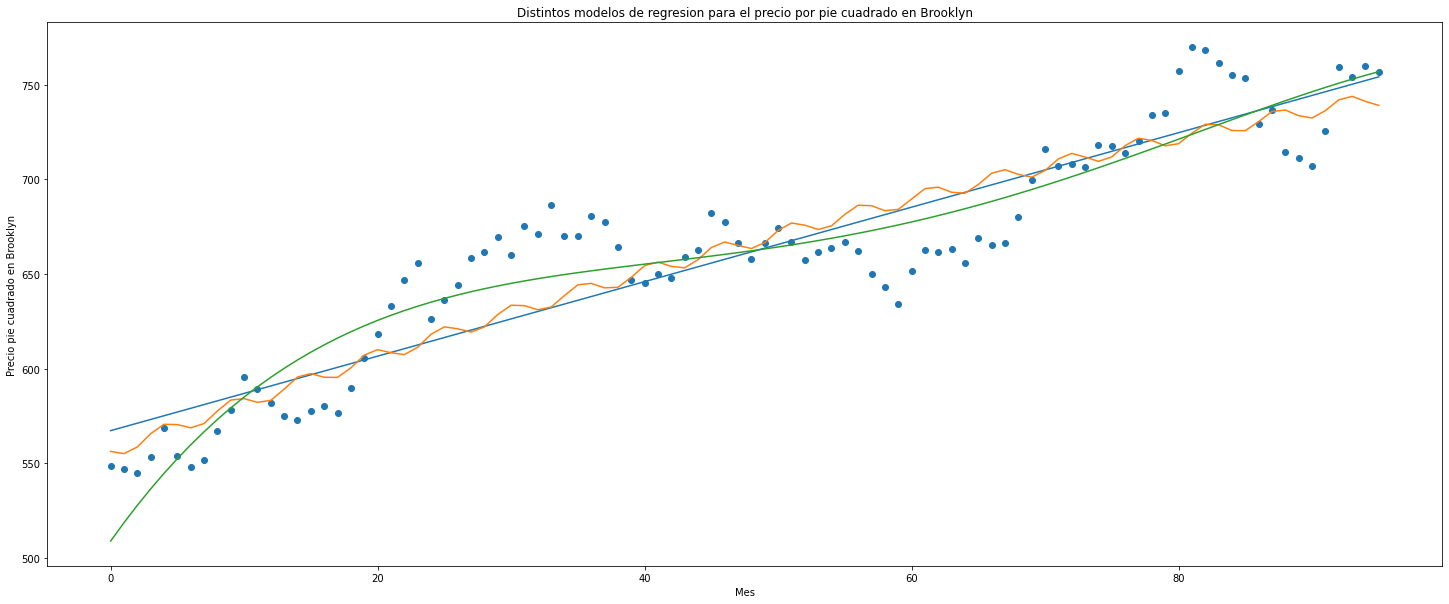

In [ ]:
plt.figure(figsize=(25, 10))

x = ppsf['n_fecha']
y = ppsf['Brooklyn']
plt.scatter(x, y, label='Datos')
ypred1=modelo_lineal(x,dl,el)
ypred2=modelo_sinusoidal_li(x,a,b,c,d,e,f)
ypred3=modelo_cubico(x, ac, bc, cc, dc, ec)
plt.plot(x,ypred1)
plt.plot(x,ypred2)
plt.plot(x,ypred3)
plt.xlabel("Mes")
plt.ylabel('Precio pie cuadrado en Brooklyn')
plt.title('Distintos modelos de regresion para el precio por pie cuadrado en Brooklyn')
plt.show()



### Qué modelo elegir?
Como se ha visto antes, existe una variacion estacional en los precios, con un pico en los meses de Septiembre y Octubre. El modelo sinusoidal fue creado para verificar esta variacion y puede verse que el valor de frecuencia del seno es consistente con ello. Por otra parte el valor de amplitud parece vastane menor frente a las fluctuaciones relacionadas con cuestiones coyunturales. Es por ello que los modelos lineal y el sinusoidal tienen muy similares valores de RMSE y R2. 
El modelo cúbico o incluso uno de mayor grado podria ajustar de mejor manera pero como se quiere utilizar el modelo para extrapolar valores en el futuro, no se utilizará (llevaria a un aumento grande en y cuando aumenta x).
Por tener mayor capacidad de ajuste, mayor adaptabilidad, incluso sin caer en sobre ajustes, **se elije el modelo sinusoidal** (modelo de una sinusoide + una parabola).

In [ ]:
def modelo_sinusoidal_li(x, a, b, c, d, e, f):
    return a*np.sin(b*x + f) + c*x**2 + d*x + e
nombres_columnas
modelo_ppsf = pd.DataFrame({'Parametros': ['a', 'b', 'c', 'd', 'e', 'f']})
metricas = pd.DataFrame({'Metrica':['R2', 'RMSE', 'RMSE_media']})
for i in nombres_columnas:
    x = ppsf['n_fecha']
    y = ppsf[i]
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size=0.3, random_state=42)


    parametros_optimizados, _ = curve_fit(modelo_sinusoidal_li, x_train, y_train)

    a, b, c, d, e, f= parametros_optimizados

    y_calc = modelo_sinusoidal_li(x_test, a=a, b=b, c=c, d=d, e=e, f=f)
    R2=r2_score(y_test, y_calc)
    rmse = mean_squared_error(y_test, y_calc, squared= False)
    y_media = y.mean()
    metricas[i]=[R2, rmse, rmse/y_media*100]
    modelo_ppsf[i] = [a, b, c, d, e, f]    
    

NameError: name 'nombres_columnas' is not defined

In [ ]:
metricas
pd.to_csv('metricas.csv')

,Parametros,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,R2,0.961349,0.845929,0.135049,0.932292,0.967927
1,RMSE,9.185563,23.210911,46.656773,14.313573,8.738375
2,RMSE_media,3.398852,3.507467,3.626713,3.141531,2.625751


In [ ]:
modelo_ppsf

,Parametros,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,a,2.629867,3.959042,-22.574007,3.662999,-1.762254
1,b,1.114891,1.204820,0.800241,0.962193,1.125437
2,c,-0.016578,-0.007414,0.022071,-0.015355,-0.008116
3,d,3.047117,2.670149,-3.075824,3.240859,2.472009
4,e,174.935257,556.120290,1367.319520,348.085326,240.013060
5,f,-7.307601,-3.189509,18.715841,4.288482,0.680143


In [ ]:
for i in nombres_columnas:
    print (i)


Bronx
Brooklyn
Manhattan
Queens
Staten Island


In [ ]:

modelo_ppsf[nombres_columnas[0]] = 2
modelo_ppsf

,Parametros,Bronx
0,a,2
1,b,2
2,c,2
3,d,2
4,e,2
5,f,2
